In [10]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

labelsize = 18
plt.style.use('ggplot')
mpl.rcParams['scatter.edgecolors'] = 'black'
mpl.rcParams['lines.markeredgecolor'] = 'black'

mpl.rc('xtick', labelsize=labelsize) 
mpl.rc('ytick', labelsize=labelsize) 
mpl.rc('axes', labelsize=labelsize) 

In [27]:
with open('../0003_source_test.json', 'r') as handle:
    data = json.load(handle)

df = pd.DataFrame(data['benchmarks'])
df = df.join(df['stats'].apply(lambda x: pd.Series(x)))
df.loc[df['name']== 'test_open_shot_all_signals', 'name'] = 'test_monohdf_open_shot_all_signals'
df['source_type'] = df['name'].apply(lambda x: x.split('_')[1])
df['op_type'] = df['name'].apply(lambda x: ' '.join(x.split('_')[2:4]))
df

,group,name,fullname,params,param,extra_info,options,stats,min,max,...,iqr_outliers,stddev_outliers,outliers,ld15iqr,hd15iqr,ops,total,iterations,source_type,op_type
0,None,test_monohdf_open_shot_all_signals,test/test_sources.py::test_open_shot_all_signals,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 22.972560725174844, 'max': 22.97256072...",22.972561,22.972561,...,0,0,0;0,22.972561,22.972561,0.043530,22.972561,1,monohdf,open shot
1,None,test_netcdf_open_shot_all_signals,test/test_sources.py::test_netcdf_open_shot_al...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 32.66345808841288, 'max': 32.663458088...",32.663458,32.663458,...,0,0,0;0,32.663458,32.663458,0.030615,32.663458,1,netcdf,open shot
2,None,test_zarr_open_shot_all_signals,test/test_sources.py::test_zarr_open_shot_all_...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 10.35652185510844, 'max': 10.356521855...",10.356522,10.356522,...,0,0,0;0,10.356522,10.356522,0.096558,10.356522,1,zarr,open shot
3,None,test_monohdf_read_shot_all_signals,test/test_sources.py::test_monohdf_read_shot_a...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 37.281176052987576, 'max': 37.28117605...",37.281176,37.281176,...,0,0,0;0,37.281176,37.281176,0.026823,37.281176,1,monohdf,read shot
4,None,test_netcdf_read_shot_all_signals,test/test_sources.py::test_netcdf_read_shot_al...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 32.906464339233935, 'max': 32.90646433...",32.906464,32.906464,...,0,0,0;0,32.906464,32.906464,0.030389,32.906464,1,netcdf,read shot
5,None,test_zarr_read_shot_all_signals,test/test_sources.py::test_zarr_read_shot_all_...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 10.532600007019937, 'max': 10.53260000...",10.532600,10.532600,...,0,0,0;0,10.532600,10.532600,0.094943,10.532600,1,zarr,read shot
6,None,test_monohdf_open_signal_all_shots,test/test_sources.py::test_monohdf_open_signal...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 0.17735671903938055, 'max': 0.21566013...",0.177357,0.215660,...,0,1,1;0,0.177357,0.215660,5.272541,0.948309,1,monohdf,open signal
7,None,test_monohdf_read_signal_all_shots,test/test_sources.py::test_monohdf_read_signal...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 0.9582102224230766, 'max': 0.995382528...",0.958210,0.995383,...,0,2,2;0,0.958210,0.995383,1.026438,4.871214,1,monohdf,read signal
8,None,test_netcdf_open_signal_all_shots,test/test_sources.py::test_netcdf_open_signal_...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 0.008003133349120617, 'max': 0.0217167...",0.008003,0.021717,...,1,2,2;1,0.008003,0.021717,103.801994,0.568390,1,netcdf,open signal
9,None,test_netcdf_read_signal_all_shots,test/test_sources.py::test_netcdf_read_signal_...,None,None,{},"{'disable_gc': False, 'timer': 'perf_counter',...","{'min': 0.5046467715874314, 'max': 0.510504923...",0.504647,0.510505,...,0,2,2;0,0.504647,0.510505,1.971936,2.535579,1,netcdf,read signal


Text(0.5, 0, 'Operation')

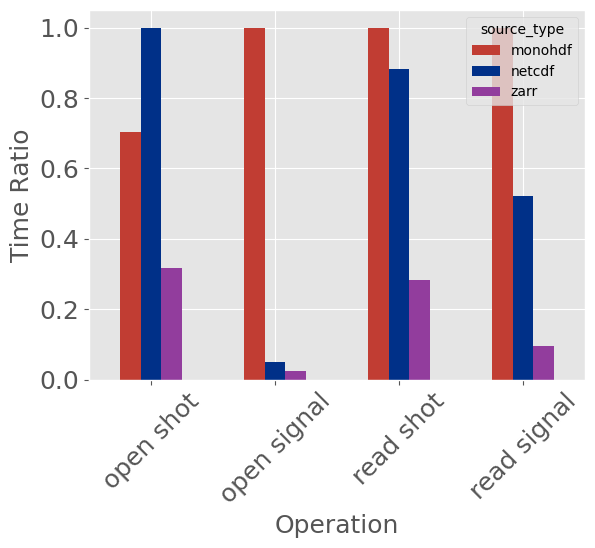

In [45]:
colors = ['#c13d33', '#003088', '#923d9d']

benchmark = df.pivot(index='op_type', columns='source_type', values='mean')
benchmark = (benchmark.T / benchmark.max(axis=1)).T
benchmark.plot.bar(rot=45, color=colors)

plt.ylabel('Time Ratio')
plt.xlabel('Operation')